### Prof. Pedram Jahangiry

You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/Deep_forecasting-USU/blob/main/Lectures%20and%20codes/Module%208-%20Prophet%20and%20NeuralProphet/Module8_prophet_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center)


## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---


# Module 8: Prophet and NeuralProphet for stock returns

Let's revisit our prophet and neural prophet models for stock market returns

**Readings**: 
1. Prophet: Forecasting at Scale paper: https://peerj.com/preprints/3190.pdf 
2. Prophet documentation: https://facebook.github.io/prophet/docs/quick_start.html  
3. NeuralProphet: Explainable forecasting at Scale: https://arxiv.org/abs/2111.15397  
4. NeuralProphet documentation: https://neuralprophet.com/contents.html  


## Installation

Refer to the NeuralProphet documentation for the most up-to-date installation guide:  https://neuralprophet.com/quickstart.html


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from neuralprophet import NeuralProphet

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Importing Stock Dataset

In [2]:
stocks = pd.read_csv("https://raw.githubusercontent.com/PJalgotrader/Deep_forecasting-USU/main/data/yfinance.csv", index_col=0, header=[0,1])
stocks.head()

Adj Close                                                 \
                 AAPL         GLD       MSFT         QQQ         SPY   
Date                                                                   
2018-01-02  40.722874  125.150002  80.229012  152.072800  243.072266   
2018-01-03  40.715786  124.820000  80.602394  153.550400  244.609711   
2018-01-04  40.904907  125.459999  81.311806  153.819046  245.640732   
2018-01-05  41.370617  125.330002  82.319908  155.363861  247.277679   
2018-01-08  41.216949  125.309998  82.403923  155.968399  247.729935   

                                      Close                         ...  \
                 TSLA        USO       AAPL         GLD       MSFT  ...   
Date                                                                ...   
2018-01-02  21.368668  96.559998  43.064999  125.150002  85.949997  ...   
2018-01-03  21.150000  98.720001  43.057499  124.820000  86.349998  ...   
2018-01-04  20.974667  98.959999  43.257500  125.459999  87.110001  ...   
2018-01-05  21.105333  98.480003  43.750000  125.330002  88.190002  ...   
2018-01-08  22.427334  99.040001  43.587502  125.309998  88.279999  ...   

                  Open                           Volume                      \
                   SPY       TSLA        USO       AAPL       GLD      MSFT   
Date                                                                          
2018-01-02  267.839996  20.799999  96.559998  102223600  11762500  22483800   
2018-01-03  268.959991  21.400000  97.360001  118071600   7904300  26061400   
2018-01-04  271.200012  20.858000  98.639999   89738400   7329700  21912000   
2018-01-05  272.510010  21.108000  98.239998   94640000   5739900  23407100   
2018-01-08  273.309998  21.066668  98.480003   82271200   3566700  22113000   

                                                    
                 QQQ       SPY       TSLA      USO  
Date                                                
2018-01-02  32573300  86655700   65283000  1497588  
2018-01-03  29383600  90070400   67822500  2156150  
2018-01-04  24776100  80636400  149194500  1480988  
2018-01-05  26992300  83524000   68868000  1609888  
2018-01-08  23159100  57319200  147891000  1229225  

[5 rows x 42 columns]

In [3]:
# if you are working with Pandas, your first job should be changing the type of the index to datetime and then to period! This is a compatibility issue with other packages. 
stocks.index

Index(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05', '2018-01-08',
       '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12', '2018-01-16',
       ...
       '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20', '2023-12-21',
       '2023-12-22', '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29'],
      dtype='object', name='Date', length=1509)

In [4]:
stocks.index = pd.to_datetime(stocks.index)
stocks.index

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-16',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=1509, freq=None)

In [5]:
df = stocks['Adj Close'][['AAPL']]
df.head()

,AAPL
Date,
2018-01-02,40.722874
2018-01-03,40.715786
2018-01-04,40.904907
2018-01-05,41.370617
2018-01-08,41.216949


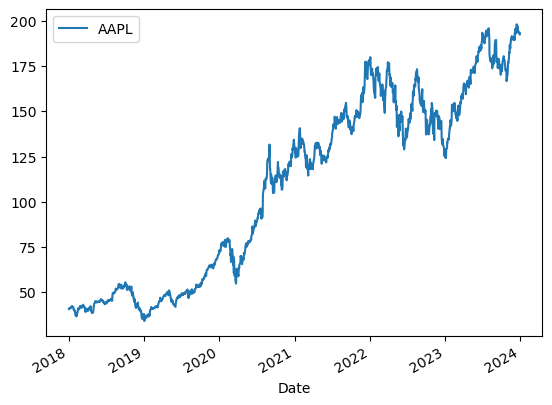

In [6]:
df.plot()
plt.show()

In [7]:
df.index

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-16',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=1509, freq=None)

# Predicting Stock prices

In [8]:
df.head()

,AAPL
Date,
2018-01-02,40.722874
2018-01-03,40.715786
2018-01-04,40.904907
2018-01-05,41.370617
2018-01-08,41.216949


In [9]:
df['ds'] = pd.to_datetime(df.index)
df['y'] = df['AAPL']
df.drop(['AAPL'], axis=1, inplace=True)

# drop the Date index 
df.reset_index(drop=True, inplace=True)
df.head()


,ds,y
0,2018-01-02,40.722874
1,2018-01-03,40.715786
2,2018-01-04,40.904907
3,2018-01-05,41.370617
4,2018-01-08,41.216949


# Model Fitting

## m1: NeuralProphet base

In [10]:
# Create the model
m1 = NeuralProphet()

metrics = m1.fit(df)
future = m1.make_future_dataframe(df, periods=24, n_historic_predictions=True)
forecast_m1 = m1.predict(future)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.289% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 100


Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (48) is too small than the required number                     for the learning rate finder (230). The results might not be optimal.


Finding best initial lr:   0%|          | 0/230 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\pedram\anaconda3\envs\prophet\lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 32. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.

WARNING - (py.warnings._showwarnmsg) - c:\Users\pedram\anaconda3\envs\prophet\lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 5. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.



Training: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.289% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.347% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.347% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.data.processing._handle_missing_data) - Dropped 24 rows at the end with NaNs in 'y' column.


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [11]:
forecast_m1.head()

,ds,y,yhat1,trend,season_yearly,season_weekly
0,2018-01-02,40.722874,38.002426,79.426025,-3.664192,-37.759403
1,2018-01-03,40.715786,38.108513,79.440262,-3.727823,-37.603920
2,2018-01-04,40.904907,38.056290,79.454491,-3.777442,-37.620758
3,2018-01-05,41.370617,37.856686,79.468719,-3.812231,-37.799805
4,2018-01-08,41.216949,37.976521,79.511421,-3.825490,-37.709408


In [12]:
# ✅ SAFE PLOTTING WITHOUT RESAMPLER
fig1 = m1.plot(forecast_m1, plotting_backend="plotly")
fig1.show()

In [14]:
# plot components
fig_components1 = m1.plot_components(forecast_m1, plotting_backend="plotly")
fig_components1.show()

Visualizing the change points in Neural Prophet

In [15]:
m1.plot_parameters(plotting_backend="plotly")


## m2: Prophet base


In [16]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

09:45:28 - cmdstanpy - INFO - Chain [1] start processing
09:45:29 - cmdstanpy - INFO - Chain [1] done processing


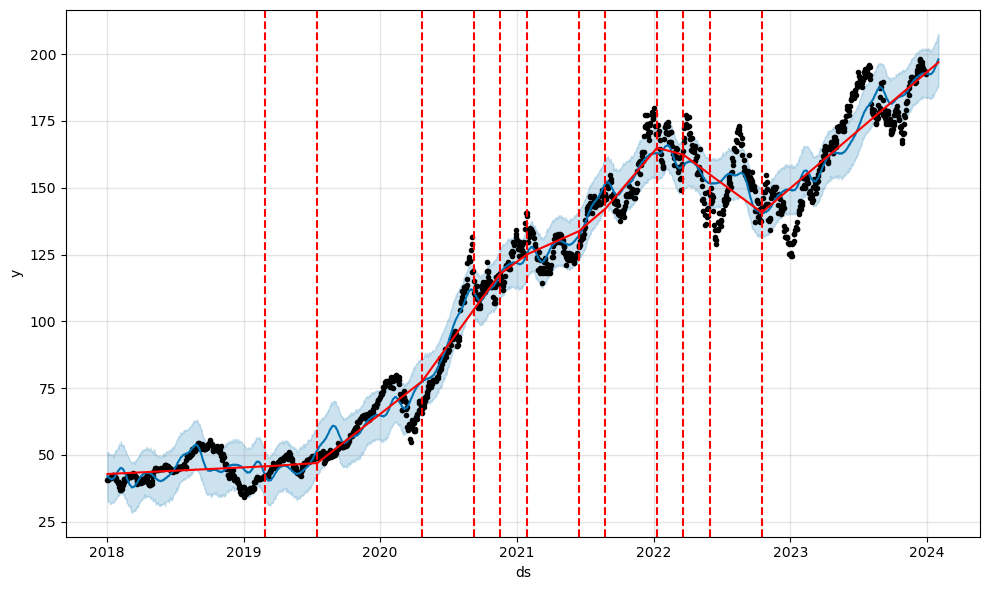

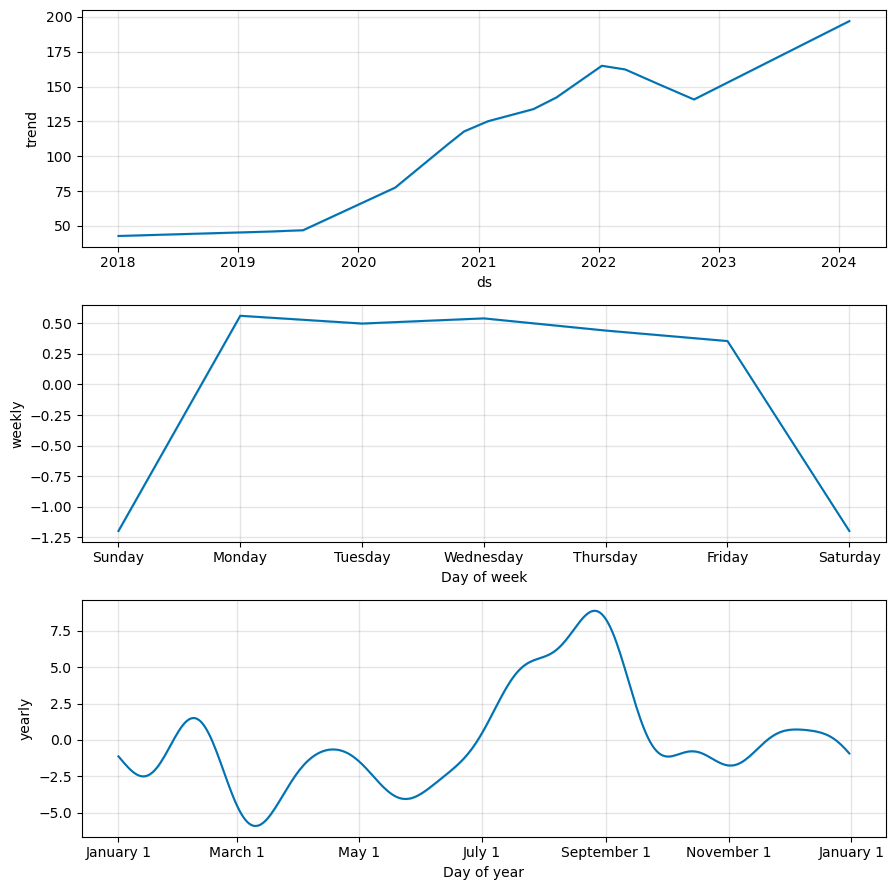

In [17]:
m2 = Prophet()

forecast_m2 = m2.fit(df).predict(future)
fig = m2.plot(forecast_m2)
a = add_changepoints_to_plot(fig.gca(), m2, forecast_m2)

fig = m2.plot_components(forecast_m2)

## m3: Prophet tuned

09:45:35 - cmdstanpy - INFO - Chain [1] start processing
09:45:36 - cmdstanpy - INFO - Chain [1] done processing


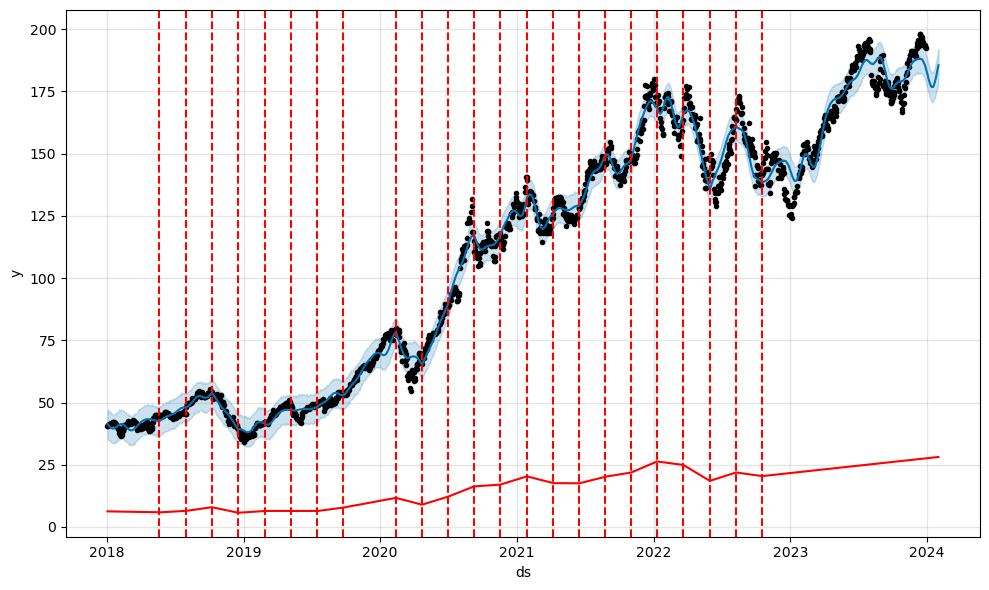

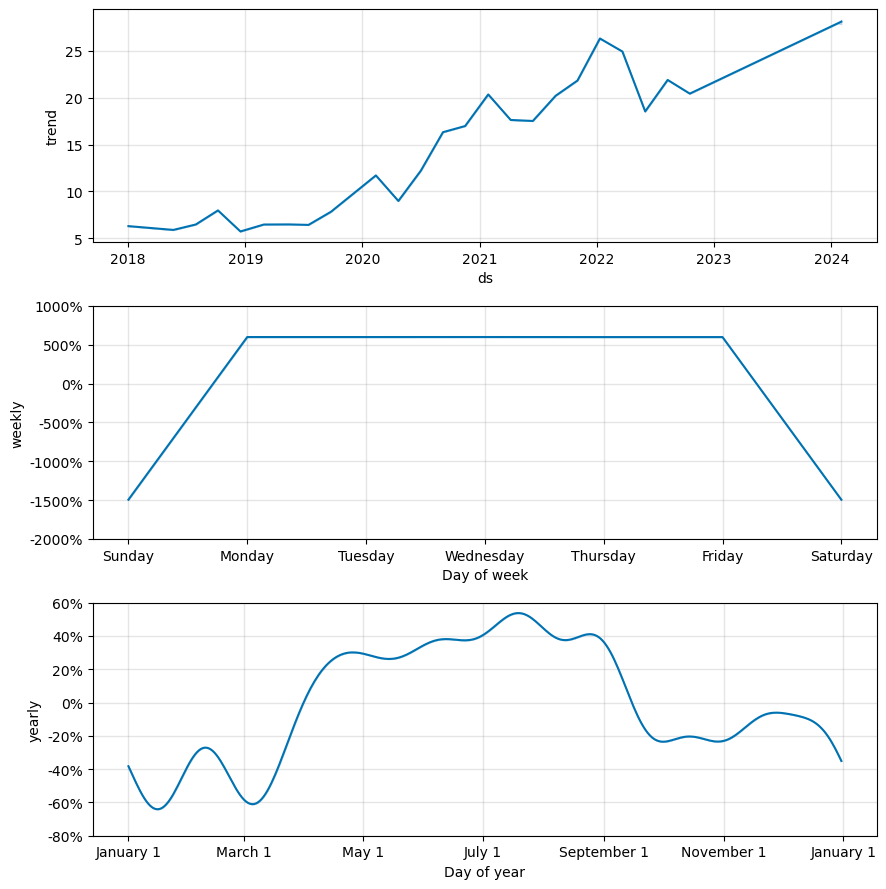

In [18]:
m3 = Prophet(
    changepoint_prior_scale=0.05,
    changepoint_range=0.8,
    seasonality_mode='multiplicative',
    seasonality_prior_scale=10
)

forecast_m3 = m3.fit(df).predict(future)
fig3 = m3.plot(forecast_m3)
a = add_changepoints_to_plot(fig3.gca(), m3, forecast_m3)

fig3 = m3.plot_components(forecast_m3)

## m4: NeuralProphet (without AR component, equivalent to prophet tuned)

#### 📋 Mapping Details:

| **Prophet Parameter**                   | **NeuralProphet Equivalent**           | **Notes**                                                |
|----------------------------------------|----------------------------------------|----------------------------------------------------------|
| `changepoint_prior_scale=0.05`         | `trend_reg=0.05`                       | Both regularize trend changes                           |
| `changepoint_range=0.8`                | `changepoints_range=0.8`              | Same concept: where changepoints can happen             |
| `seasonality_mode='multiplicative'`    | `seasonality_mode='multiplicative'`   | Forces multiplicative modeling                          |
| `seasonality_prior_scale=10`           | `seasonality_reg=10`                  | Regularizes seasonality strength                        |
| No quantiles in Prophet by default     | `quantiles=None`                       | Prophet optimizes only point prediction                 |

In [19]:
# you can disacle logging messages unless there is an error: 
from neuralprophet import set_log_level
set_log_level("ERROR")

In [20]:
m4 = NeuralProphet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode="multiplicative",
    changepoints_range=0.8,
    trend_reg=0.05,
    seasonality_reg=10,
    quantiles=None   # Turn OFF quantile regression for pure point forecasting
)

metrics = m4.fit(df)
forecast_m4 = m4.predict(future)

Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr:   0%|          | 0/230 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

In [21]:
# ✅ SAFE PLOTTING WITHOUT RESAMPLER
fig4 = m4.plot(forecast_m4, plotting_backend="plotly")
fig4.show()

In [22]:
m4.plot_parameters(plotting_backend="plotly")


In [23]:
forecast_m4.tail()

,ds,y,yhat1,trend,season_yearly
1528,2024-01-26,NaN,144.116898,147.881592,-3.764696
1529,2024-01-29,NaN,144.284424,147.718842,-3.434410
1530,2024-01-30,NaN,144.345276,147.664612,-3.319337
1531,2024-01-31,NaN,144.404327,147.610352,-3.206017
1532,2024-02-01,NaN,144.459198,147.556091,-3.096907


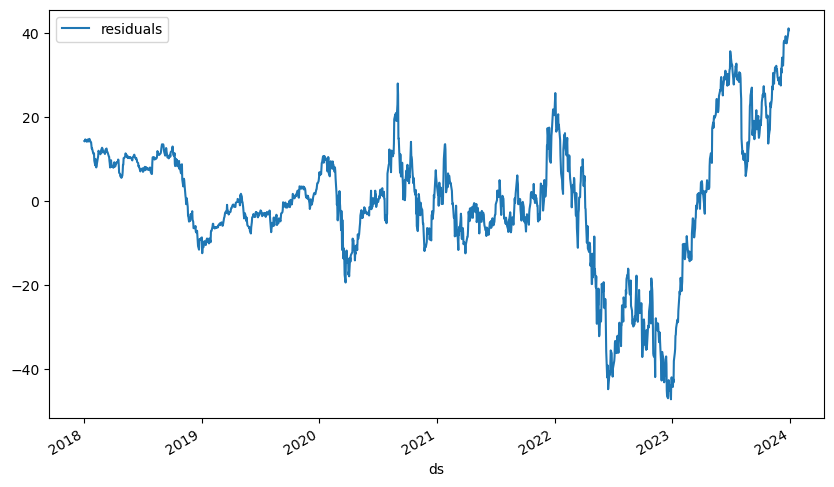

In [24]:
# plotting the residuals 
df_residuals = pd.DataFrame({"ds": df["ds"], "residuals": df["y"] - forecast_m4["yhat1"]})
fig = df_residuals.plot(x="ds", y="residuals", figsize=(10, 6))


Clearly there is an AR component in the residuals. Let's address that! 

## m5: NeuralProphet (AR-Net)

In [25]:
# adding seasonality priors and autoregression
m5 = NeuralProphet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    changepoints_range=0.8,
    trend_reg=0.05,
    seasonality_reg=10,
    quantiles=None,   # Turn OFF quantile regression for pure point forecasting

    n_lags= 1, 
    # Autoregression (lagged values) with 3 lag
    ar_layers= [] ,  # linear AR with 3 lags. We could do ar_layers = [20,10] for 2 hidden layers with 20 and 10 neurons respectively.] 



    drop_missing= True, 
    # impute_missing=True
)


metrics_m5 = m5.fit(df)
forecast_m5 = m5.predict(future)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr:   0%|          | 0/230 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\pedram\anaconda3\envs\prophet\lib\site-packages\pytorch_lightning\utilities\data.py:79: UserWarning:

Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 27. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.




Training: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

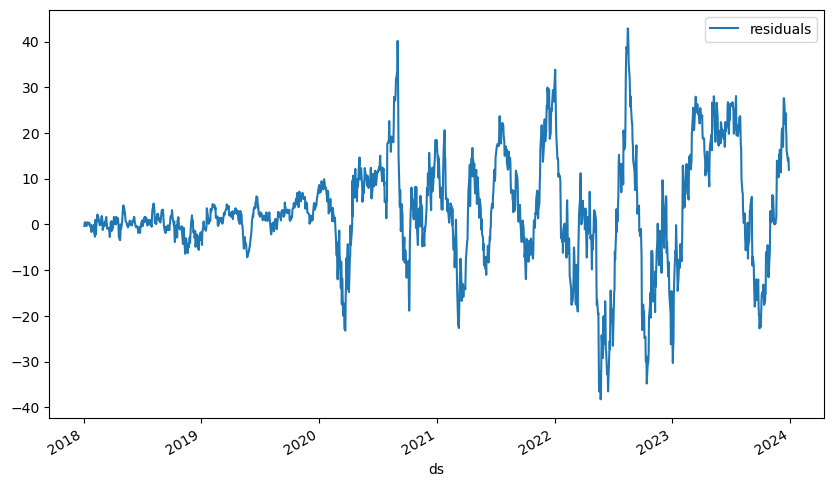

In [26]:
# plotting the residuals 
df_residuals = pd.DataFrame({"ds": df["ds"], "residuals": df["y"] - forecast_m5["yhat1"]})
fig = df_residuals.plot(x="ds", y="residuals", figsize=(10, 6))

In [27]:
fig5 = m5.plot(forecast_m5, plotting_backend="plotly")
fig5.show()

fig_components5 = m5.plot_components(forecast_m5, plotting_backend="plotly")
fig_components5.show()

In [28]:
m5.plot_parameters(plotting_backend="plotly")


## m6:NeuralProphet (AR-NET + Events)


In [29]:
# Build model with events
m6 = NeuralProphet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    changepoints_range=0.8,
    trend_reg=0.05,
    seasonality_reg=10,
    quantiles=None,   # Turn OFF quantile regression for pure point forecasting

    n_lags= 1, 
    # Autoregression (lagged values) with 3 lag
    drop_missing= True, 
    # impute_missing=True
)

# Add event explicitly

m6 = m6.add_country_holidays("US")


# Fit and predict
metrics_m6 = m6.fit(df)
forecast_m6 = m6.predict(future)

fig6 = m6.plot(forecast_m6, plotting_backend="plotly")
fig6.show()


Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr:   0%|          | 0/230 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

In [190]:
m6.plot_components(forecast_m6, plotting_backend="plotly")

In [30]:
m6.plot_parameters(plotting_backend="plotly")


## Model Evaluations & Diagnostics

### Uncertainty Modeling 

NeuralProphet does support multiple ways to incorporate uncertainty into the forecast. 
- quantile regression: https://en.wikipedia.org/wiki/Quantile_regression
- conformal prediction 

In [31]:
confidence_level = 0.90
boundaries = round((1 - confidence_level) / 2, 3)        # 0.05
upper = round(confidence_level + boundaries, 3)          # 0.95
quantiles = [boundaries, upper]
print(quantiles)  # [0.05, 0.95]

[0.05, 0.95]


In [32]:
df.head()

,ds,y
0,2018-01-02,40.722874
1,2018-01-03,40.715786
2,2018-01-04,40.904907
3,2018-01-05,41.370617
4,2018-01-08,41.216949


In [33]:
m = NeuralProphet(quantiles=quantiles) # using the basic NeuralProphet model to see the wider confidence intervals

metrics = m.fit(df)


Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr:   0%|          | 0/230 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

In [34]:
futures = m.make_future_dataframe(df, periods=24, n_historic_predictions=True)
forecast = m.predict(futures)
m.plot(forecast, plotting_backend="plotly")

Predicting: |          | 0/? [00:00<?, ?it/s]

While the defined coverage is guaranteed for the training date, it is not guaranteed for unseen data. More complex methods like Conformal Prediction can be used to guarantee marginal coverage for unseen data. 

conformal prediction (Naive approach): 
1. Split your time series into a training period (to fit your model) and a calibration period, 
2. then for each point in the calibration set compute its nonconformity score: $s_i = \lvert y_i - \hat{y}_i \rvert$
3. pick the quantile of those scores (ex. 90%)
4. build your prediction intervals for forecasts 

$$\mathrm{PI}_{1-\alpha}(\hat{y}_t) = \bigl[\hat{y}_t - q,\;\hat{y}_t + q\bigr]$$



In [35]:
# evaluate uncertainy on calibration set
train_df, cal_df = m.split_df(df, valid_p=0.1)
method = "naive"  # or "cqr" for a more sophisticated method, see uncertainty tutorial

Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

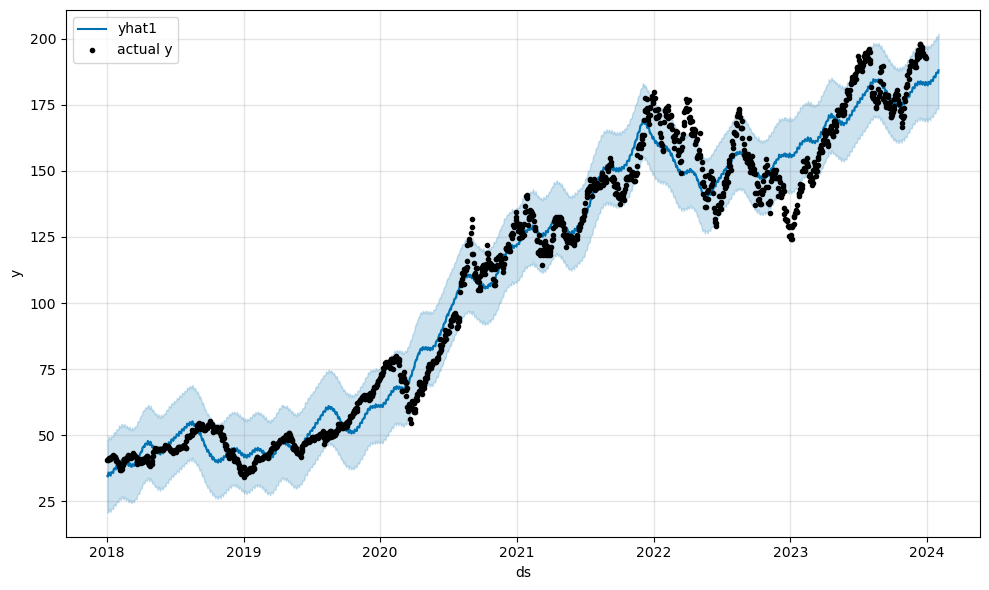

In [36]:
conformal_forecast = m.conformal_predict(futures, cal_df, alpha=0.1, method=method)
m.plot(conformal_forecast, plotting_backend="matplotlib")

the caveates of the quantile regression approach is that it requires linear model. Conformal prediction intervals are model agnostic. 

In [37]:
conformal_forecast.head()

,ds,y,yhat1,yhat1 5.0%,yhat1 95.0%,trend,season_yearly,season_weekly
0,2018-01-02,40.722874,34.606930,20.894436,48.319424,-85.074860,-3.453083,123.134872
1,2018-01-03,40.715786,34.402058,20.689564,48.114552,-85.027382,-3.499400,122.928841
2,2018-01-04,40.904907,35.140652,21.428158,48.853146,-84.979897,-3.533857,123.654404
3,2018-01-05,41.370617,35.947872,22.235378,49.660366,-84.932411,-3.555748,124.436035
4,2018-01-08,41.216949,34.990116,21.277622,48.702610,-84.789970,-3.544947,123.325027


### Train-Test Evaluation

In [38]:
m = NeuralProphet()
df_train, df_test = m.split_df(df=df, valid_p=0.2)


In [39]:
metrics_train = m.fit(df=df_train)
metrics_train 


Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr:   0%|          | 0/227 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\pedram\anaconda3\envs\prophet\lib\site-packages\pytorch_lightning\utilities\data.py:79: UserWarning:

Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 24. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.




Training: |          | 0/? [00:00<?, ?it/s]

,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss,epoch
0,0.883378,0.0,159.165146,193.446198,0.883001,0.0,0
1,0.619582,0.0,116.963234,143.460251,0.619127,0.0,1
2,0.400595,0.0,84.111923,101.228004,0.399963,0.0,2
3,0.265660,0.0,66.822090,76.597122,0.265193,0.0,3
4,0.196191,0.0,58.557728,67.317764,0.196194,0.0,4
...,...,...,...,...,...,...,...
105,0.003226,0.0,5.327913,6.603737,0.003231,0.0,105
106,0.003228,0.0,5.347192,6.614210,0.003229,0.0,106
107,0.003217,0.0,5.354534,6.621607,0.003220,0.0,107
108,0.003204,0.0,5.356415,6.562496,0.003214,0.0,108


In [40]:
metrics_test = m.test(df=df_test)

metrics_test

Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           0.03981867805123329
         MAE_val            17.139877319335938
        RMSE_val             20.7268123626709
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


,MAE_val,RMSE_val,Loss_test,RegLoss_test
0,17.139877,20.726812,0.039819,0.0


### Cross-validation

In [41]:
METRICS = ["MAE", "RMSE"]
METRICS_VAL = ["MAE_val", "RMSE_val"]
params = {"seasonality_mode": "multiplicative"}

folds = NeuralProphet(**params).crossvalidation_split_df(df, k=5, fold_pct=0.20, fold_overlap_pct=0.5)

# fold_pct = 0.20 means that each fold will be 20% of the data
# fold_overlap_pct = 0.5 means that each fold will overlap with the next fold by 50% of the data
# This means that the first fold will be 20% of the data, the second fold will be 20% of the data starting from 10% of the data, and so on.

In [42]:
metrics_train = pd.DataFrame(columns=METRICS)
metrics_test = pd.DataFrame(columns=METRICS_VAL)

for df_train, df_test in folds:
    m = NeuralProphet(**params)
    m.set_plotting_backend("matplotlib")
    train = m.fit(df=df_train)
    test = m.test(df=df_test)

    # Get the last row (epoch) of the metrics dataframe for train and test
    last_train = train[METRICS].iloc[-1]
    last_test  = test[METRICS_VAL].iloc[-1]

    # Append the last row to the metrics dataframe for train and test
    metrics_train.loc[len(metrics_train)] = last_train
    metrics_test.loc[len(metrics_test)]   = last_test




Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr:   0%|          | 0/221 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\pedram\anaconda3\envs\prophet\lib\site-packages\pytorch_lightning\utilities\data.py:79: UserWarning:

Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 28. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.




Training: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           0.12283818423748016
         MAE_val             10.08496379852295
        RMSE_val            12.454319953918457
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr:   0%|          | 0/223 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\pedram\anaconda3\envs\prophet\lib\site-packages\pytorch_lightning\utilities\data.py:79: UserWarning:

Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 19. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.




Training: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           0.09185075759887695
         MAE_val            16.437416076660156
        RMSE_val            19.848407745361328
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr:   0%|          | 0/225 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\pedram\anaconda3\envs\prophet\lib\site-packages\pytorch_lightning\utilities\data.py:79: UserWarning:

Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 10. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.




Training: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           0.10628997534513474
         MAE_val             20.57254981994629
        RMSE_val             26.71229362487793
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr:   0%|          | 0/226 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\pedram\anaconda3\envs\prophet\lib\site-packages\pytorch_lightning\utilities\data.py:79: UserWarning:

Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 1. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.




Training: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           0.14169812202453613
         MAE_val            34.550994873046875
        RMSE_val             40.16407775878906
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr:   0%|          | 0/227 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           0.05815069377422333
         MAE_val            20.594303131103516
        RMSE_val            25.294349670410156
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [43]:
metrics_test

,MAE_val,RMSE_val
0,10.084964,12.454320
1,16.437416,19.848408
2,20.572550,26.712294
3,34.550995,40.164078
4,20.594303,25.294350


In [45]:
metrics_test.describe()


,MAE_val,RMSE_val
count,5.000000,5.000000
mean,20.448046,24.894690
std,8.977871,10.208396
min,10.084964,12.454320
25%,16.437416,19.848408
50%,20.572550,25.294350
75%,20.594303,26.712294
max,34.550995,40.164078


You could also do train-validation-test evaluation or train-cross validation-cross test evaluation: https://neuralprophet.com/how-to-guides/feature-guides/test_and_crossvalidate.html

Exercise: 
Rerun the m1 through m6 models using timeseries simple train-test evaluation or cross validation and see which model is the winner for airline passenger data. 
Good luck! 

## Comparing Models

In [46]:
from prophet import Prophet
from neuralprophet import NeuralProphet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Prepare data (predicting the last 24 days to be consistent with our findings from PyCaret)
train = df.iloc[:-24].copy()
test = df.iloc[-24:].copy()



# Define evaluation function
def evaluate_model_full(model, name, train_data):
    # Check if the model is Prophet (classical) or NeuralProphet
    if isinstance(model, Prophet):
        # Prophet uses periods only
        model.fit(train_data)
        future = model.make_future_dataframe(periods=24)
        
        forecast = model.predict(future)
        forecast = forecast[['ds', 'yhat']].dropna()

        # yhat column for Prophet
        y_pred = forecast['yhat'].values[-24:]

    elif isinstance(model, NeuralProphet):
        # NeuralProphet uses freq + n_historic_predictions
        model.fit(train_data)
        future = model.make_future_dataframe(train_data, periods=24, n_historic_predictions=False)

        forecast = model.predict(future)
        forecast = forecast.dropna(subset=["yhat1"])

        # yhat1 column for NeuralProphet
        y_pred = forecast['yhat1'].values

    else:
        raise ValueError("Unsupported model type. Must be Prophet or NeuralProphet.")

    # Align y_true and y_pred
    y_true = test['y'].values[-len(y_pred):]

    # Metrics
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    mse = mean_squared_error(y_true, y_pred)

    return [name, mae, mape, mse]

# -----------------------------------
# Define models
# -----------------------------------

# M1 - Neural prophet with default settings
m1_eval = NeuralProphet()

# M2 - prophet with default setting
m2_eval = Prophet()

# M3 
m3_eval = Prophet(
    changepoint_prior_scale=0.05,
    changepoint_range=0.8,
    seasonality_prior_scale=10
)

# M4
m4_eval = NeuralProphet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    changepoints_range=0.8,
    trend_reg=0.05,
    seasonality_reg=10,
    quantiles=None 
)

# M5
m5_eval = NeuralProphet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    changepoints_range=0.8,
    trend_reg=0.05,
    seasonality_reg=10,
    quantiles=None,   # Turn OFF quantile regression for pure point forecasting

    n_lags= 1, 
    # Autoregression (lagged values) with 1 lag
    drop_missing= True, 
    # impute_missing=True
)

# M6
m6_eval = NeuralProphet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    changepoints_range=0.8,
    trend_reg=0.05,
    seasonality_reg=10,
    quantiles=None,   # Turn OFF quantile regression for pure point forecasting

    n_lags= 1, 
    # Autoregression (lagged values) with 1 lag
    drop_missing= True, 
    # impute_missing=True
)
m6_eval = m6_eval.add_country_holidays("US")

# Special train/future for M4
train_m6 = train.copy()
future_m6 = m6_eval.make_future_dataframe(train_m6, periods=24, n_historic_predictions=True)




In [47]:

# -----------------------------------
# Evaluate all models
# -----------------------------------

results = []


# M1
results.append(evaluate_model_full(m1_eval, "M1 - np base", train))

#M2
results.append(evaluate_model_full(m2_eval, "M2 - p base", train))

# M3
results.append(evaluate_model_full(m3_eval, "M3 - p tuned", train))

# M4
results.append(evaluate_model_full(m4_eval, "M4 - np tuned no AR", train))

# M5
results.append(evaluate_model_full(m5_eval, "M5 - np AR-NET", train))

# M6
results.append(evaluate_model_full(m6_eval, "M6 - np AR-NET events", train_m6))



# -----------------------------------
# Final Metrics Table
# -----------------------------------

metrics_table = pd.DataFrame(results, columns=["Model", "MAE", "MAPE (%)", "MSE"])


Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr:   0%|          | 0/230 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\pedram\anaconda3\envs\prophet\lib\site-packages\pytorch_lightning\utilities\data.py:79: UserWarning:

Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 13. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.




Training: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

09:53:46 - cmdstanpy - INFO - Chain [1] start processing
09:53:46 - cmdstanpy - INFO - Chain [1] done processing
09:53:46 - cmdstanpy - INFO - Chain [1] start processing
09:53:46 - cmdstanpy - INFO - Chain [1] done processing


Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr:   0%|          | 0/230 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr:   0%|          | 0/230 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\pedram\anaconda3\envs\prophet\lib\site-packages\pytorch_lightning\utilities\data.py:79: UserWarning:

Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 2. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.




Training: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr:   0%|          | 0/230 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

In [49]:
metrics_table

,Model,MAE,MAPE (%),MSE
0,M1 - np base,16.526333,8.520903,280.088167
1,M2 - p base,6.228772,3.201821,45.312164
2,M3 - p tuned,6.228772,3.201821,45.312164
3,M4 - np tuned no AR,50.478830,26.052314,2571.658987
4,M5 - np AR-NET,2.951813,1.533170,8.713198
5,M6 - np AR-NET events,2.736938,1.421565,7.490832


Recall: what we achieved by using PyCaret before when fh=24 days. 

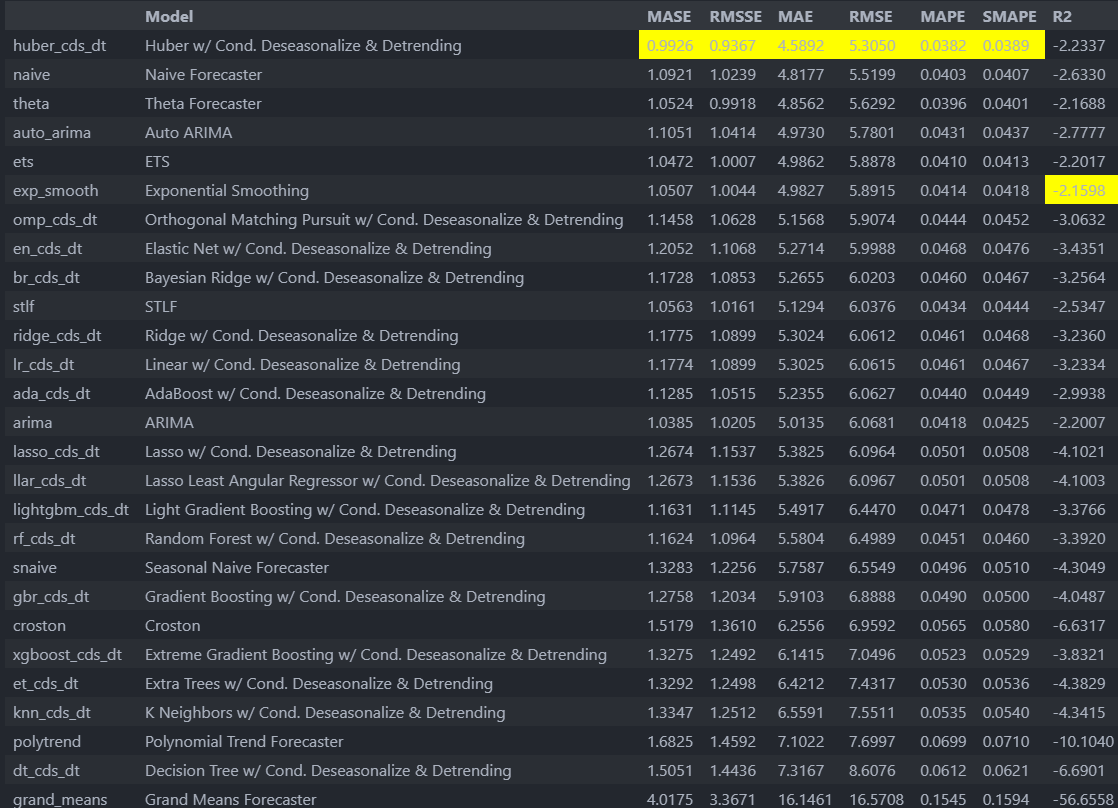

* Default Prophet and NeuralProphet models cannot outbid the naive forecaster!!!

* Tuning changepoints and seasonality improves both Prophet and NeuralProphet models.

* Adding autoregression (AR-Net) helps NeuralProphet capture short-term dependencies.

* NeuralProphet models with AR + events (M6) achieved the best accuracy.

* Tuning + domain knowledge = best forecasting performance.

Done